In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df_normal = pd.read_csv("./aws/raw/sensor_data.csv")
df_normal.head()

,ph_value,timestamp,status,do_value,temp_value,salinity_value,id,serialNumber
0,6.7,2025-05-09 23:23:43,True,9.73,30.1,256.3,c6b3cf4b-85ab-4250-ad74-0a47bc3e2e80,SN-47F2B3CE
1,6.7,2025-05-09 23:23:23,True,9.73,30.1,256.3,ec4a8850-173e-4d5a-90a1-a211596fa273,SN-47F2B3CE
2,6.7,2025-05-09 23:22:38,True,9.73,30.1,258.0,f2379ab4-4d84-4a4b-a402-9b1f0d8f8b2d,SN-47F2B3CE
3,6.5,2025-05-09 23:29:11,True,9.73,30.1,258.0,85f58ec7-8bd3-4bab-9128-29c01d795305,SN-47F2B3CE
4,6.8,2025-05-09 23:25:23,True,9.73,30.1,258.0,e85ebb4d-a808-46d0-b57b-d0aa5389fdc2,SN-47F2B3CE


In [3]:
df_normal = df_normal.drop(['timestamp', 'id', 'serialNumber' ], axis=1)
df_normal.head()

,ph_value,status,do_value,temp_value,salinity_value
0,6.7,True,9.73,30.1,256.3
1,6.7,True,9.73,30.1,256.3
2,6.7,True,9.73,30.1,258.0
3,6.5,True,9.73,30.1,258.0
4,6.8,True,9.73,30.1,258.0


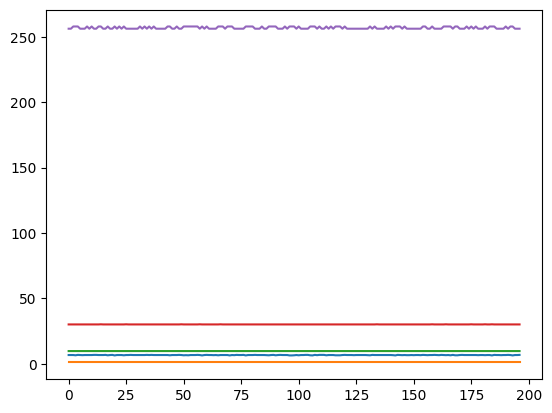

In [4]:
plt.plot(df_normal)

In [5]:
df_normal.to_csv('./aws/filtered/normal.csv', index=False)

In [6]:
df_lowPH = pd.read_csv("./aws/raw/sensor_Acidic_Waterdata.csv")
df_lowPH = df_lowPH.drop(['timestamp', 'id', 'serialNumber' ], axis=1)
df_lowPH.head()

,ph_value,status,do_value,temp_value,salinity_value
0,12.4,True,9.61,29.0,420.4
1,12.4,True,9.60,28.9,426.2
2,12.4,True,9.60,29.0,426.2
3,12.6,True,9.60,28.9,422.3
4,12.7,True,9.61,29.0,420.4


In [7]:
df_lowPH.to_csv('./aws/filtered/low_Ph.csv', index=False)

In [8]:
df = pd.read_csv("./aws/raw/sensor_High_pH_data.csv")
df = df.drop(['timestamp', 'id', 'serialNumber' ], axis=1)
df.head()

,ph_value,status,do_value,temp_value,salinity_value
0,9.4,True,9.62,27.8,136.0
1,9.5,True,9.61,27.8,165.9
2,6.7,True,9.62,27.9,169.4
3,7.2,True,9.62,27.9,174.5
4,13.4,True,9.62,27.8,136.0


In [9]:
df.to_csv('./aws/filtered/high_Ph.csv', index=False)

In [10]:
directory = r"G:\AIT\MLOps\ProjectAnalytics\aws\raw"

def listFilePath(directory) -> list:
    paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            full_path = os.path.join(root, file)
            paths.append(full_path)
    return paths

listFilePath(directory)

['G:\\AIT\\MLOps\\ProjectAnalytics\\aws\\raw\\sensor_Acidic_Waterdata.csv',
 'G:\\AIT\\MLOps\\ProjectAnalytics\\aws\\raw\\sensor_clean_data.csv',
 'G:\\AIT\\MLOps\\ProjectAnalytics\\aws\\raw\\sensor_data.csv',
 'G:\\AIT\\MLOps\\ProjectAnalytics\\aws\\raw\\sensor_Dish_soap_data.csv',
 'G:\\AIT\\MLOps\\ProjectAnalytics\\aws\\raw\\sensor_High_pH_data.csv',
 'G:\\AIT\\MLOps\\ProjectAnalytics\\aws\\raw\\sensor_Milk_data.csv',
 'G:\\AIT\\MLOps\\ProjectAnalytics\\aws\\raw\\sensor_Salt_water_data.csv']

In [11]:
directory = r"G:\AIT\MLOps\ProjectAnalytics\aws\raw"

def listFilePath(directory) -> list:
    paths = []
    for root, dirs, files in os.walk(directory):
        for file in files:
            full_path = os.path.join(root, file)
            paths.append(full_path)
    return paths

raw_data = listFilePath(directory)
for data in raw_data:
    df = pd.read_csv(data)
    df = df.drop(['timestamp', 'id', 'serialNumber', 'status' ], axis=1)
    
    filename = os.path.basename(data).lower()
    print(filename)

    if 'clean' in filename:
        df.to_csv('./aws/filtered/clean2_Ph.csv', index=False)
    # elif 'dish' in filename:
    #     df.to_csv('./aws/filtered/Chemical.csv', index=False)
    # elif 'salt' in filename:
    #     df.to_csv('./aws/filtered/Salt.csv', index=False)
    # elif 'milk' in filename:
    #     df.to_csv('./aws/filtered/Organic.csv', index=False)
    # elif 'acidic' in filename:
    #     df.to_csv('./aws/filtered/low_Ph.csv', index=False)
    # else:
    #     df.to_csv('./aws/filtered/clean.csv', index=False)

sensor_acidic_waterdata.csv
sensor_clean_data.csv
sensor_data.csv
sensor_dish_soap_data.csv
sensor_high_ph_data.csv
sensor_milk_data.csv
sensor_salt_water_data.csv
